In [3]:
# Импорт необходимых инструментов
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.exposure import histogram
import os
import math
from PIL import Image

In [4]:
# Смена исходных изображений на ЧБ формат
first_image = Image.open("./images/shelby.jpg")
first_image = first_image.convert('L')
first_image.save('./images/shelby_black.jpg')

second_image = Image.open("./images/steve.jpg")
second_image = second_image.convert('L')
second_image.save('./images/steve_black.jpg')

<Figure size 432x288 with 0 Axes>

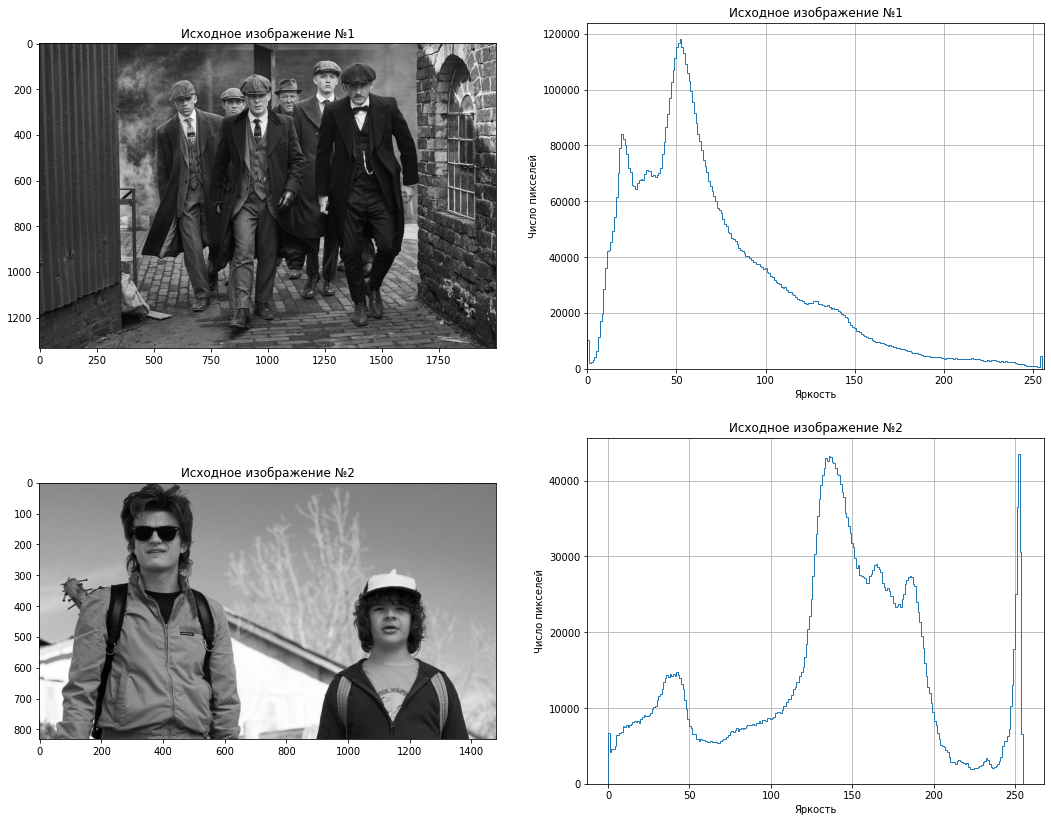

In [9]:
function_fig = plt.figure()

function_fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)


ax1.set_title('Исходное изображение №1')
ax2.set_title('Исходное изображение №1')
ax3.set_title('Исходное изображение №2')
ax4.set_title('Исходное изображение №2')
ax2.set_xlabel('Яркость')
ax2.set_ylabel('Число пикселей')
ax4.set_xlabel('Яркость')
ax4.set_ylabel('Число пикселей')
ax2.set_xlim(0, 256)
ax2.set_xlim(0, 256)
ax2.grid(True)
ax4.grid(True)

first_image = cv2.imread("./images/shelby_black.jpg") #Открываем изображение.
second_image = cv2.imread("./images/steve_black.jpg") #Открываем изображение.

ax1.imshow(first_image)
ax2.hist(first_image.ravel(),bins = 256, histtype = 'step' )
ax3.imshow(second_image)
ax4.hist(second_image.ravel(),bins = 256, histtype = 'step' )

plt.show()

<Figure size 432x288 with 0 Axes>

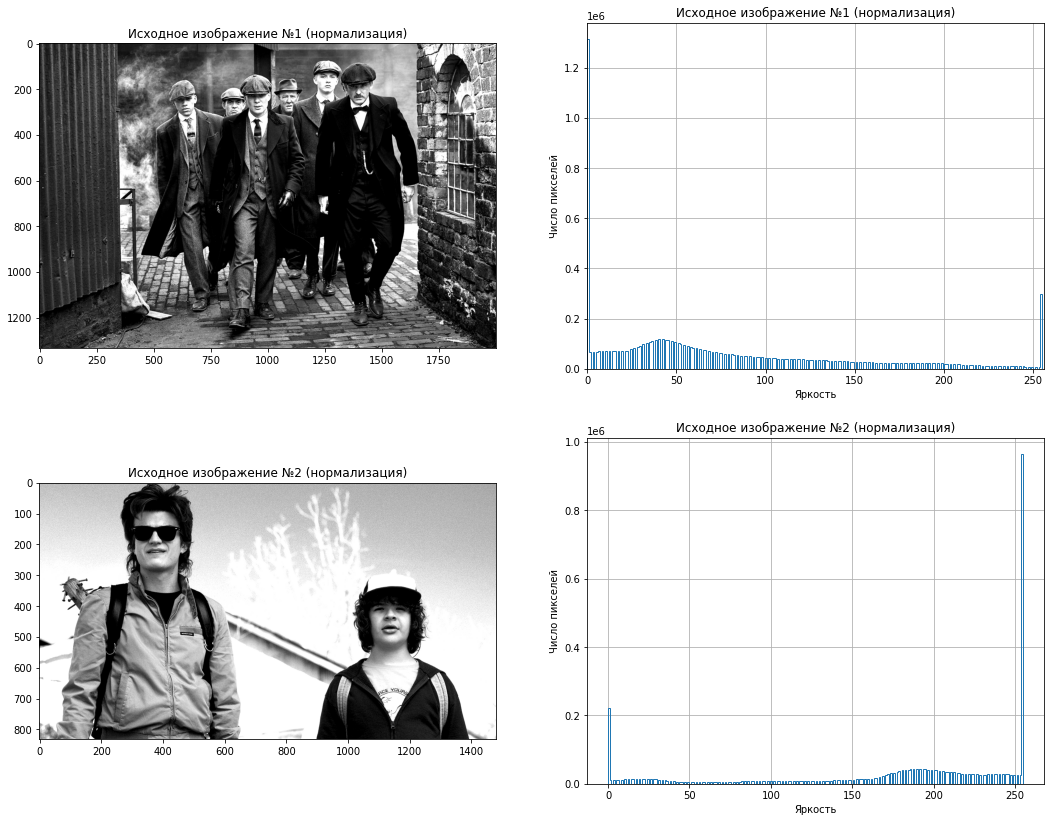

In [10]:
#нормализация гистограмм
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax1.set_title('Исходное изображение №1 (нормализация)')
ax2.set_title('Исходное изображение №1 (нормализация)')
ax3.set_title('Исходное изображение №2 (нормализация)')
ax4.set_title('Исходное изображение №2 (нормализация)')
ax2.set_xlabel('Яркость')
ax2.set_ylabel('Число пикселей')
ax4.set_xlabel('Яркость')
ax4.set_ylabel('Число пикселей')
ax2.set_xlim(0, 256)
ax2.set_xlim(0, 256)
ax2.grid(True)
ax4.grid(True)

first_image_normalize = first_image.copy()
second_image_normalize = second_image.copy()

first_image_normalize = cv2.normalize(first_image_normalize, None, -50, 400, norm_type=cv2.NORM_MINMAX)
second_image_normalize = cv2.normalize(second_image_normalize, None, -50, 400, norm_type=cv2.NORM_MINMAX)


ax1.imshow(first_image_normalize)
ax2.hist(first_image_normalize.ravel(),bins = 256, histtype = 'step' )
ax3.imshow(second_image_normalize)
ax4.hist(second_image_normalize.ravel(),bins = 256, histtype = 'step' )

plt.show()

<Figure size 432x288 with 0 Axes>

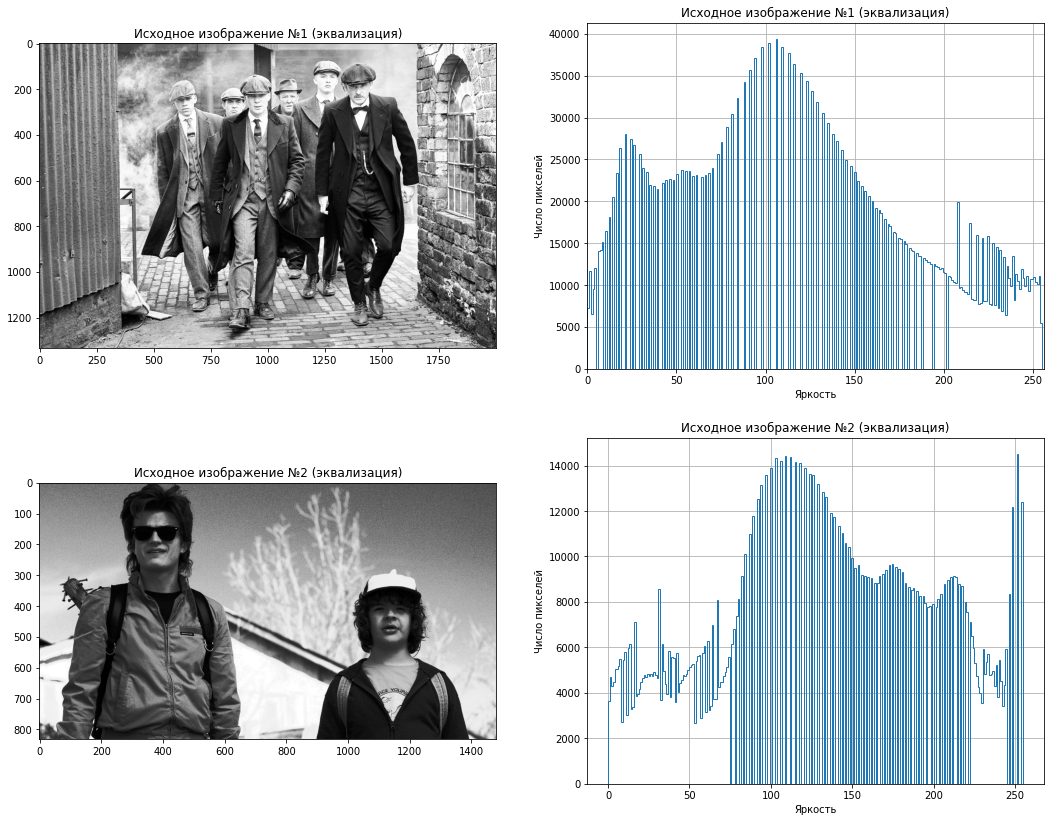

In [12]:
#Эквализация гистограмм
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax1.set_title('Исходное изображение №1 (эквализация)')
ax2.set_title('Исходное изображение №1 (эквализация)')
ax3.set_title('Исходное изображение №2 (эквализация)')
ax4.set_title('Исходное изображение №2 (эквализация)')
ax2.set_xlabel('Яркость')
ax2.set_ylabel('Число пикселей')
ax4.set_xlabel('Яркость')
ax4.set_ylabel('Число пикселей')
ax2.set_xlim(0, 256)
ax2.set_xlim(0, 256)
ax2.grid(True)
ax4.grid(True)

first_image_equalize = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
second_image_equalize = cv2.cvtColor(second_image, cv2.COLOR_BGR2GRAY)

first_image_equalize = cv2.equalizeHist(first_image_equalize)
second_image_equalize = cv2.equalizeHist(second_image_equalize)


ax1.imshow(first_image_equalize, cmap="gray")
ax2.hist(first_image_equalize.ravel(), bins = 256, histtype = 'step')

ax3.imshow(second_image_equalize, cmap="gray")
ax4.hist(second_image_equalize.ravel(), bins = 256, histtype = 'step')

plt.show()

<Figure size 432x288 with 0 Axes>

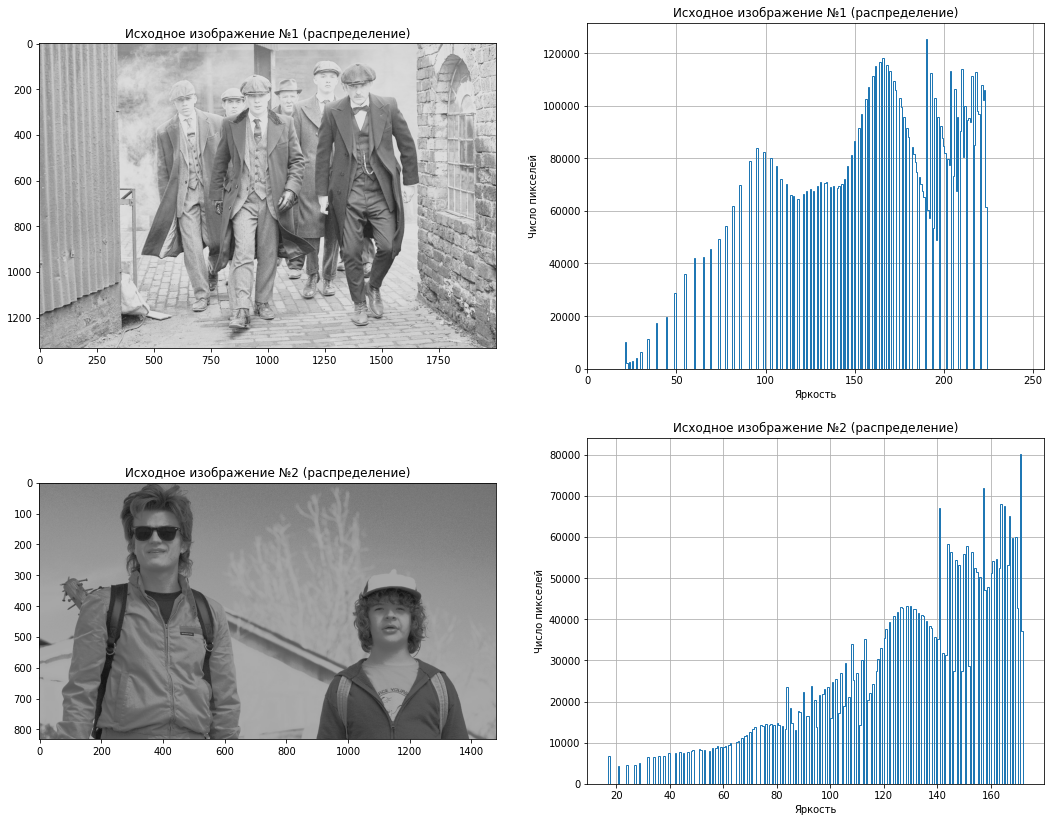

In [19]:
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax1.set_title('Исходное изображение №1 (распределение)')
ax2.set_title('Исходное изображение №1 (распределение)')
ax3.set_title('Исходное изображение №2 (распределение)')
ax4.set_title('Исходное изображение №2 (распределение)')
ax2.set_xlabel('Яркость')
ax2.set_ylabel('Число пикселей')
ax4.set_xlabel('Яркость')
ax4.set_ylabel('Число пикселей')
ax2.set_xlim(0, 256)
ax2.set_xlim(0, 256)
ax2.grid(True)
ax4.grid(True)

x = np.arange(1, 255, 1)
y = 2 * x**2 + 18 * x - 3

def find_closest(A, target):
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A) - 1)
    left = A[idx - 1]
    right = A[idx]
    idx -= target - left < right - target
    return A[idx]
def function_prived(image, x, y):
    # функция распределения гистограммы
    hist, hist_centers = histogram(image)
    img_accum = []
    func_accum = []    
    dict_img = {}
    dict_func = {}
    dict_res = {}
    s = 0
    for i in range(len(hist)):
        s += hist[i]
        img_accum.append(s)
    for key, val in zip(hist_centers, img_accum):
        dict_img[key] = val
    s = 0
    for i in range(len(y)):
        s += y[i]
        func_accum.append(s)
    for key, val in zip(x, func_accum):
        dict_func[key] = val
    A = np.array(func_accum)
    target = list(img_accum)
    new_match = find_closest(A, target)
    tmp = []
    for i in find_closest(A, target):
        for key, value in dict_func.items():  
            if value == i:
                tmp.append(key)
    for key, value in zip(hist_centers, tmp):
        dict_res[key] = value
    shape_img = image.shape   
    image_copy = image.copy()
    image_copy = image_copy.ravel()
    for i in range(len(image_copy)):
        image_copy[i] = dict_res[image_copy[i]]
    image_copy = image_copy.reshape(shape_img)   
    return image_copy

first_image_with_function = function_prived(first_image, x, y)
second_image_with_function = function_prived(second_image, x, y)

ax1.imshow(first_image_with_function, cmap="gray")
ax2.hist(first_image_with_function.ravel(), bins = 256, histtype = 'step')

ax3.imshow(second_image_with_function, cmap="gray")
ax4.hist(second_image_with_function.ravel(), bins = 256, histtype = 'step')

plt.show()

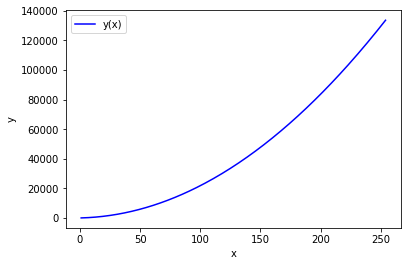

In [20]:
x = np.arange(1, 255, 1)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="y(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()